Material for the book [Probability and Statistics for Data Science](https://a.co/d/cAss9mO). A free preprint, videos, code, slides and solutions to exercises are available at https://www.ps4ds.net/

Code for Example 11.28

Analysis of wheat seed data, containing several features of seeds from three different wheat varieties\
Topics and relevant videos: [principal component analysis](https://www.youtube.com/watch?v=hPM7F2CP9vQ), [dimensionality reduction](https://www.youtube.com/watch?v=ODMRtd3dj7s)

Author: Carlos Fernandez-Granda\
Data source: https://archive.ics.uci.edu/dataset/236/seeds

Sample covariance matrix [[ 1.    1.    0.61  0.95  0.98 -0.23  0.87]
 [ 1.    1.    0.53  0.98  0.95 -0.22  0.9 ]
 [ 0.61  0.53  1.    0.37  0.77 -0.33  0.23]
 [ 0.95  0.98  0.37  1.    0.86 -0.17  0.94]
 [ 0.98  0.95  0.77  0.86  1.   -0.26  0.75]
 [-0.23 -0.22 -0.33 -0.17 -0.26  1.   -0.01]
 [ 0.87  0.9   0.23  0.94  0.75 -0.01  1.  ]]


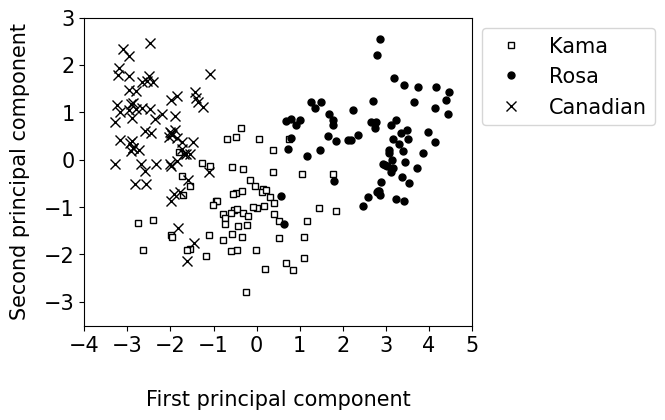

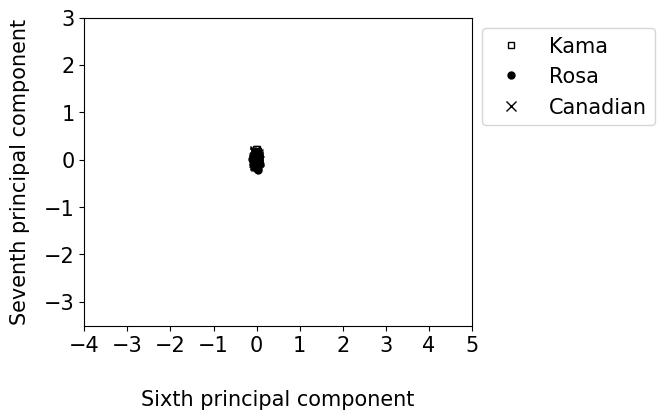

In [10]:
import os.path
import numpy as np
import math
import matplotlib.pyplot as plt
np.set_printoptions(precision=2)

font_size = 15
font_size_legend = 15
font_size_ticks = 15
font_size_graph = 15

dataset = np.loadtxt("../data/seeds_dataset.txt")
data = dataset[:,:-1]
labels = dataset[:,-1]

# Center the columns 
centered_data = data - data.mean(axis=0)
# Normalize each column (divide by standard deviation) to account for difference in units
standardized_data = (centered_data  / centered_data.std(axis=0)).T

sample_covariance_matrix = np.cov(standardized_data)
print("Sample covariance matrix",sample_covariance_matrix)

# Principal component analysis
eigval,U = np.linalg.eig(sample_covariance_matrix)
u_1 = U[:,0]
u_2 = U[:,1]
u_b4last = U[:,-2]
u_last = U[:,-1]

proj_1 = u_1.T @ standardized_data
proj_2 = u_2.T @ standardized_data
proj_b4last = u_b4last.T @ standardized_data
proj_last = u_last.T @ standardized_data

x_min = -4
x_max = 5
y_min = -3.5
y_max = 3

marker_size = 5

fig = plt.figure(figsize = (5,4)) 
plt.plot(proj_1[labels==1],proj_2[labels==1], markersize=marker_size, color="white", marker='s', markeredgewidth=1,
            linestyle = 'None',markeredgecolor="black",label="Kama")
plt.plot(proj_1[labels==2],proj_2[labels==2], markersize=marker_size, color="black", marker='o', markeredgewidth=1,
            linestyle = 'None',markeredgecolor="black",label="Rosa")
plt.plot(proj_1[labels==3],proj_2[labels==3], markersize=marker_size+2, c="black", marker='x', markeredgewidth=1,
            linestyle = 'None',markeredgecolor="black",label="Canadian")
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
plt.xticks(fontsize=font_size_ticks) 
plt.yticks(fontsize=font_size_ticks)
plt.xlabel("First principal component", fontsize=font_size,labelpad=25)
plt.ylabel("Second principal component", fontsize=font_size,labelpad=10)
plt.legend(fontsize=font_size_legend,bbox_to_anchor=(1, 1), loc='upper left', ncol=1)

fig = plt.figure(figsize = (5,4)) 
plt.plot(proj_b4last[labels==1],proj_last[labels==1], markersize=marker_size, color="white", marker='s', markeredgewidth=1,
            linestyle = 'None',markeredgecolor="black",label="Kama")
plt.plot(proj_b4last[labels==2],proj_last[labels==2], markersize=marker_size, color="black", marker='o', markeredgewidth=1,
            linestyle = 'None',markeredgecolor="black",label="Rosa")
plt.plot(proj_b4last[labels==3],proj_last[labels==3], markersize=marker_size+2, c="black", marker='x', markeredgewidth=1,
            linestyle = 'None',markeredgecolor="black",label="Canadian")
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
plt.xticks(fontsize=font_size_ticks) 
plt.yticks(fontsize=font_size_ticks)
plt.xlabel(r"Sixth principal component", fontsize=font_size,labelpad=25)
plt.ylabel(r"Seventh principal component", fontsize=font_size,labelpad=10)
plt.legend(fontsize=font_size_legend,bbox_to_anchor=(1, 1), loc='upper left', ncol=1);